In [1]:
import numpy as np
from keras.datasets import fashion_mnist
from keras.layers import Input, Dense, Activation
from keras.models import Model
from keras.models import Sequential
import matplotlib.pyplot as plt

In [2]:
(x_train, _), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

In [12]:
autoencoder = Sequential([
    Dense(784, input_shape=(784,)),
    Activation('relu'),
    Dense(32),
    Activation('relu'),
    Dense(32),
    Activation('relu'),
    Dense(784),
    Activation('sigmoid'),
])

# autoencoder = Sequential([
#     Dense(784, input_shape=(784,), activation = 'relu'),
#     Dense(32, activation = 'relu'),
#     Dense(784, activation = 'sigmoid')
# ])

In [15]:
# compile
autoencoder.compile(optimizer='adam', loss='mse')

## train
history = autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 5s 21ms/step - loss: 2.9450e-06 - val_loss: 2.8765e-06
Epoch 2/50
235/235 [==============================] - 6s 25ms/step - loss: 2.8109e-06 - val_loss: 2.7358e-06
Epoch 3/50
235/235 [==============================] - 5s 21ms/step - loss: 2.6710e-06 - val_loss: 2.5918e-06
Epoch 4/50
235/235 [==============================] - 5s 20ms/step - loss: 2.5244e-06 - val_loss: 2.4454e-06
Epoch 5/50
235/235 [==============================] - 5s 22ms/step - loss: 2.3885e-06 - val_loss: 2.3199e-06
Epoch 6/50
235/235 [==============================] - 5s 23ms/step - loss: 2.2709e-06 - val_loss: 2.2120e-06
Epoch 7/50
 52/235 [=====>........................] - ETA: 5s - loss: 2.2119e-06

KeyboardInterrupt: ignored

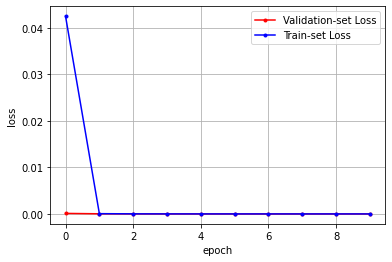

In [7]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

313/313 [==============================] - 1s 3ms/step


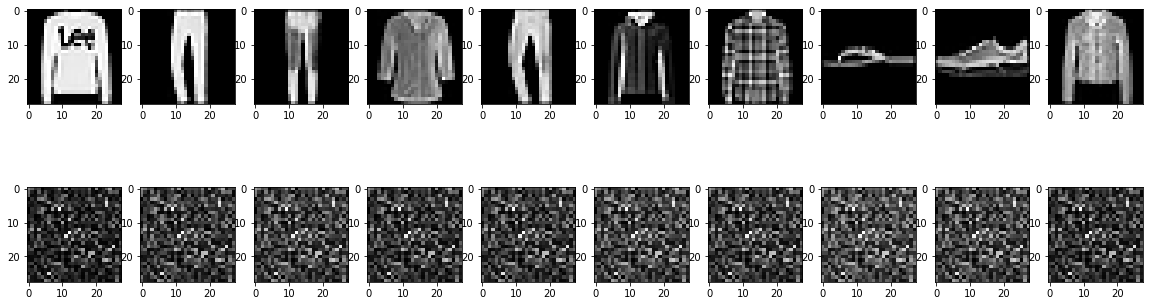

In [14]:
import matplotlib.pyplot as plt

decoded_imgs = autoencoder.predict(x_test)

plt.figure(figsize=(20, 6))
for i in range(1, 10+1):
  ax = plt.subplot(2, 10, i)
  plt.imshow(x_test[i].reshape(28, 28), cmap='gray')

  ax = plt.subplot(2, 10, i+10)
  plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')

plt.show()